In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import numpy as np
import scipy as sp
import h5py
from scipy.interpolate import interp1d
from scipy.linalg import sqrtm, solve_sylvester, solve_lyapunov
import matplotlib.pyplot as plt
import sys
import pseudo
import os
import glob
import miscUtil
import ops
%matplotlib inline

os.environ['DATA'] = os.environ['DATA186']
physDataDir = os.environ['DATA'] + 'phys/'
specDataDir = os.environ['DATA'] + 'spec/'
covDataDir = os.environ['DATA'] + 'cov/'
libDir = os.environ['LINLIB']
figureFolder = 'figures/'
os.environ['DATA590'] = '/mnt/kepler/sabarish/data/R590hr/'


# Average mean velocity profiles

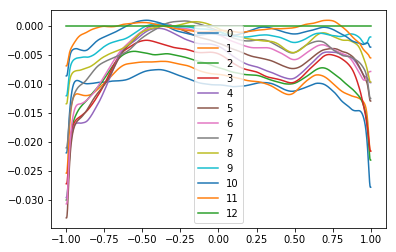

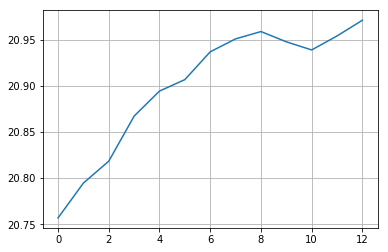

In [16]:
avgDir = os.environ['DATA590']+'avg/'
tStart = 25000  # First snapshot (before 4500, tStep is 200, so ignore those)
tEnd = 45900   # Last snapshot available
wSize = 2000 # Size of moving window 
wStep = 1500 # Distance between successive windows
tStartLastWin = tEnd - wSize
nWindows = ( tStartLastWin-tStart )//wStep 
tStartFirstWin = tStartLastWin - nWindows*wStep
tStartArr = np.arange( tStartFirstWin, tStartLastWin+10, wStep )
tWinArr = np.arange(0,wSize+10, 100)

#tArr = 4500+ np.arange(1000,34100,3000).reshape(12,1) + np.arange(0,4950,100).reshape(1,50)
tArr = tStartArr.reshape((tStartArr.size,1)) + tWinArr.reshape((1,tWinArr.size))
yCC = miscUtil.nodesCellCenters(nCells=384)
Usum = np.zeros((tArr.shape[0], yCC.size))
for i0 in range(tArr.shape[0]):
    U = np.zeros(384)
    for i1 in range(tArr.shape[1]):
        t = tArr[i0,i1]
        U += np.loadtxt(avgDir + 'u_avg_it%d.dat'%t)[3:-3]
    Usum[i0] = U/tArr.shape[1]

for i0 in range(tArr.shape[0]):
    plt.plot(yCC, (Usum[i0]-Usum[-1])/Usum[-1])
plt.legend(np.arange(tArr.shape[0]))
plt.show()

plt.plot(np.arange(tArr.shape[0]), np.mean(Usum[:,190:196],axis=1))
plt.grid(True)
plt.show()